Import all necessary libraries


In [52]:
# Importing essential libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams as rcP
%matplotlib inline

Reading Dataset

In [5]:
df = pd.read_csv('/Pune_House_Data.csv')
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [6]:
df.shape

(13320, 9)

In [7]:
# Exploring the dataset
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
# Exploring the dataset
df.groupby('size')['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [10]:
df.groupby('site_location')['site_location'].agg('count')

site_location
Alandi Road        139
Ambegaon Budruk    139
Anandnagar         139
Aundh              139
Aundh Road         139
                  ... 
Wakadewadi         138
Wanowrie           138
Warje              138
Yerawada           138
other                1
Name: site_location, Length: 97, dtype: int64

In [11]:
# Removing the columns of society
df = df.drop('society', axis='columns')
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,1200,2.0,1.0,51.00,Aundh Road


In [12]:
# Data Cleaning
# Checking the null values in the dataset
df.isnull().sum()

area_type          0
availability       0
size              16
total_sqft         0
bath              73
balcony          609
price              0
site_location      1
dtype: int64

In [14]:
# Applying median to the balcony and bath column
from math import floor

balcony_median = float(floor(df.balcony.median()))
bath_median = float(floor(df.bath.median()))

df.balcony = df.balcony.fillna(balcony_median)
df.bath = df.bath.fillna(bath_median)

In [15]:
# Checking the null values in the dataset again
df.isnull().sum()

area_type         0
availability      0
size             16
total_sqft        0
bath              0
balcony           0
price             0
site_location     1
dtype: int64

In [16]:
# Dropping the rows with null values because the dataset is huge as compared to null values.
df = df.dropna()
df.isnull().sum()

area_type        0
availability     0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

In [17]:
# Converting the size column to bhk
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df = df.drop('size', axis='columns')
df.groupby('bhk')['bhk'].agg('count')

bhk
1      656
2     5527
3     4857
4     1417
5      356
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk, dtype: int64

In [18]:
# Exploring the total_sqft column
df.total_sqft.unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
# Since the total_sqft contains range values such as 1133-1384, lets filter out these values
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
# Displaying all the rows that are not integers
df[~df['total_sqft'].apply(isFloat)]

,area_type,availability,total_sqft,bath,balcony,price,site_location,bhk
30,Super built-up Area,19-Dec,2100 - 2850,4.0,0.0,186.000,Gultekdi,4
56,Built-up Area,20-Feb,3010 - 3410,2.0,2.0,192.000,Model colony,4
81,Built-up Area,18-Oct,2957 - 3450,2.0,2.0,224.500,Shukrawar Peth,4
122,Super built-up Area,18-Mar,3067 - 8156,4.0,0.0,477.000,Ganeshkhind,4
137,Super built-up Area,19-Mar,1042 - 1105,2.0,0.0,54.005,Khadaki,2
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,1804 - 2273,3.0,0.0,122.000,Gokhale Nagar,3
13059,Super built-up Area,Ready To Move,1200 - 1470,2.0,0.0,72.760,Anandnagar,2
13240,Super built-up Area,Ready To Move,1020 - 1130,2.0,2.0,52.570,Vadgaon Budruk,1
13265,Super built-up Area,20-Sep,1133 - 1384,2.0,0.0,59.135,Dapodi,2


In [28]:
# Converting the range values to integer values and removing other types of error
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [29]:
df['new_total_sqft'] = df.total_sqft.apply(convert_sqft_to_num)
df = df.drop('total_sqft', axis='columns')
df.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0


In [34]:
# Displaying all the rows that are not integers
df[~df['new_total_sqft'].apply(isFloat)]

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft


In [21]:
# Exploring the dataset
df.shape

(13303, 8)

In [22]:
# Exploring the dataset
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2009
Super built-up  Area    8789
Name: area_type, dtype: int64

In [24]:

# Exploring the dataset
df.groupby('bhk')['bhk'].agg('count')

bhk
1      656
2     5527
3     4857
4     1417
5      356
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk, dtype: int64

In [25]:
# Exploring the dataset
df.groupby('site_location')['site_location'].agg('count')

site_location
Alandi Road        139
Ambegaon Budruk    139
Anandnagar         139
Aundh              138
Aundh Road         139
                  ... 
Wakadewadi         138
Wanowrie           138
Warje              137
Yerawada           137
other                1
Name: site_location, Length: 97, dtype: int64

In [26]:
df.head()

,area_type,availability,total_sqft,bath,balcony,price,site_location,bhk
0,Super built-up Area,19-Dec,1056,2.0,1.0,39.07,Alandi Road,2
1,Plot Area,Ready To Move,2600,5.0,3.0,120.00,Ambegaon Budruk,4
2,Built-up Area,Ready To Move,1440,2.0,3.0,62.00,Anandnagar,3
3,Super built-up Area,Ready To Move,1521,3.0,1.0,95.00,Aundh,3
4,Super built-up Area,Ready To Move,1200,2.0,1.0,51.00,Aundh Road,2


In [35]:
# Removing the rows in new_total_sqft column that hase None values
df.isna().sum()

area_type          0
availability       0
bath               0
balcony            0
price              0
site_location      0
bhk                0
new_total_sqft    46
dtype: int64

In [36]:
# Removing the rows in new_total_sqft column that hase None values
df = df.dropna()
df.isna().sum()

area_type         0
availability      0
bath              0
balcony           0
price             0
site_location     0
bhk               0
new_total_sqft    0
dtype: int64

## **Feature Engineering**

In [37]:
# Adding a new column of price_per_sqft
df1 = df.copy()

# In our dataset the price column is in Lakhs
df1['price_per_sqft'] = (df1['price']*100000)/df1['new_total_sqft']
df1.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0,4250.000000


In [39]:
# Calulating all the unqiue values in 'site_location' column
location_stats = df1.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
location_stats

site_location
Pune Railway Station    139
Paud Road               139
Ganesh Peth             139
Mangalwar peth          139
Manik Bagh              139
                       ... 
Nagar Road              136
Narayangaon             136
Fatima Nagar            136
Camp                    136
other                     1
Name: site_location, Length: 97, dtype: int64

In [40]:
# Checking locations with less than 10 values
print(len(location_stats[location_stats<=10]), len(df1.site_location.unique()))

1 97


In [42]:
# Labelling the locations with less than or equal to 10 occurences to 'other'
locations_less_than_10 = location_stats[location_stats<=10]

df1.site_location = df1.site_location.apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(df1.site_location.unique())

97

In [43]:
# Checking the unique values in 'availability column'
df1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

availability
Ready To Move    10541
18-Dec             306
18-May             294
18-Apr             271
18-Aug             199
                 ...  
15-Jun               1
15-Dec               1
15-Aug               1
14-Nov               1
14-Jul               1
Name: availability, Length: 80, dtype: int64

In [44]:
# Labelling the dates into Not Ready
dates = df1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)
dates

availability
Ready To Move    10541
18-Dec             306
18-May             294
18-Apr             271
18-Aug             199
                 ...  
15-Jun               1
15-Dec               1
15-Aug               1
14-Nov               1
14-Jul               1
Name: availability, Length: 80, dtype: int64

In [45]:
dates_not_ready = dates[dates<10000]
df1.availability = df1.availability.apply(lambda x: 'Not Ready' if x in dates_not_ready else x)

len(df1.availability.unique())

2

In [46]:
df1.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,Not Ready,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0,4250.000000


## **Removing Outliers**

In [47]:
# Removing the rows that have 1 Room for less than 300sqft

df2 = df1[~(df1.new_total_sqft/df1.bhk<300)]
print(len(df2), len(df1))

12513 13257


In [48]:
df2.price_per_sqft.describe()

count     12513.000000
mean       6307.567166
std        4160.879784
min         267.829813
25%        4211.469534
50%        5295.138889
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [49]:
# Since there is a wide range for 'price_per_sqft' column with min = Rs.267/sqft till max = Rs. 127470/sqft, we remove the extreme ends using the SD
def remove_pps_outliers(df):
    
    df_out = pd.DataFrame()
    
    for key, sub_df in df.groupby('site_location'):
        m = np.mean(sub_df.price_per_sqft)
        sd = np.std(sub_df.price_per_sqft)
        reduce_df = sub_df[(sub_df.price_per_sqft>(m-sd)) & (sub_df.price_per_sqft<(m+sd))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    
    return df_out

df3 = remove_pps_outliers(df2)
print(len(df2), len(df3))

12513 10937


In [50]:
df3.price_per_sqft.describe()

count    10937.000000
mean      5382.407727
std       1606.041361
min       1379.310345
25%       4186.952288
50%       5109.489051
75%       6333.333333
max      17548.524329
Name: price_per_sqft, dtype: float64

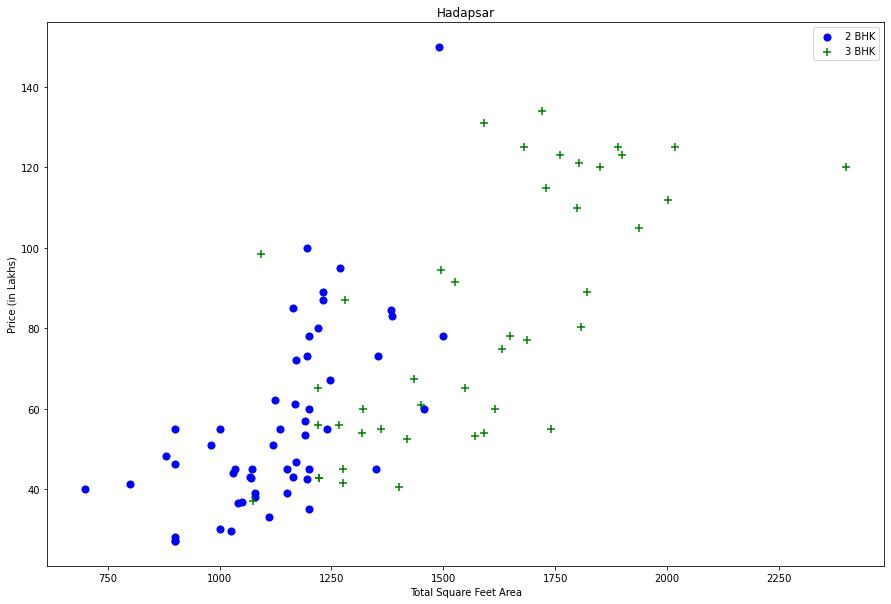

In [64]:
def plot_scatter_chart(df, site_location):
    bhk2 = df[(df.site_location == site_location) & (df.bhk == 2)]
    bhk3 = df[(df.site_location == site_location) & (df.bhk == 3)]
    rcP['figure.figsize'] = (15,10)
    plt.scatter(bhk2.new_total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.new_total_sqft, bhk3.price, color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (in Lakhs)')
    plt.title(site_location)
    plt.legend()
    
plot_scatter_chart(df3, 'Hadapsar')

In [59]:
# Here we observe that 3 BHK cost that same as 2 BHK in 'Hadapsar' location hence removing such outliers is necessary
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for site_location, site_location_df in df.groupby('site_location'):
        bhk_stats = {}
        
        for bhk, bhk_df in site_location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in site_location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis='index')

df4 = remove_bhk_outliers(df3)
print(len(df3), len(df4))

10937 7459


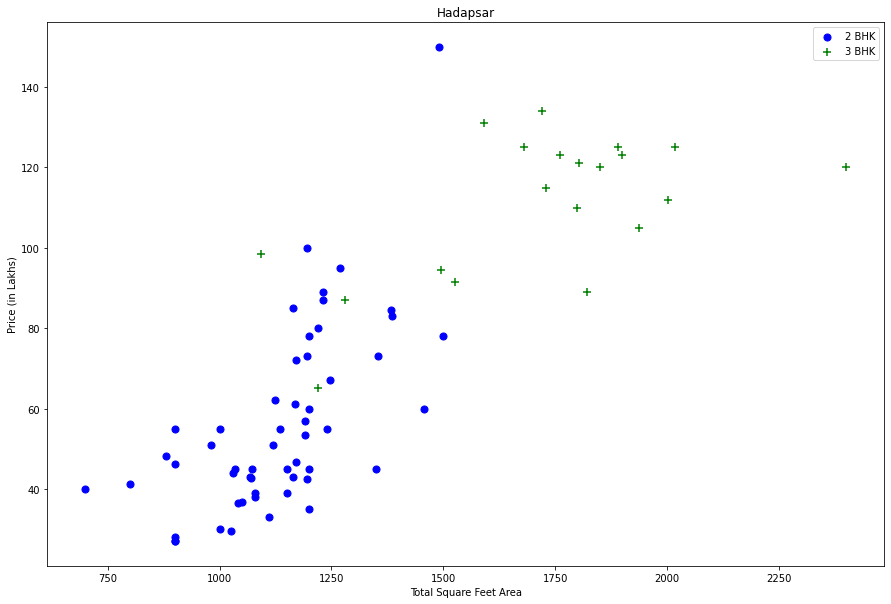

In [65]:
plot_scatter_chart(df4, 'Hadapsar')

Text(0, 0.5, 'Count')

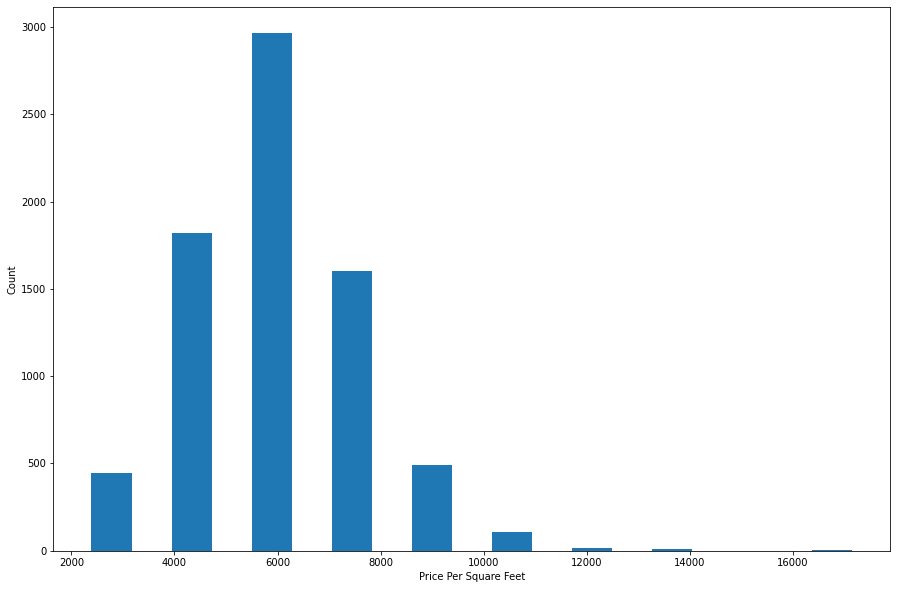

In [66]:
plt.hist(df4.price_per_sqft, rwidth=0.5)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

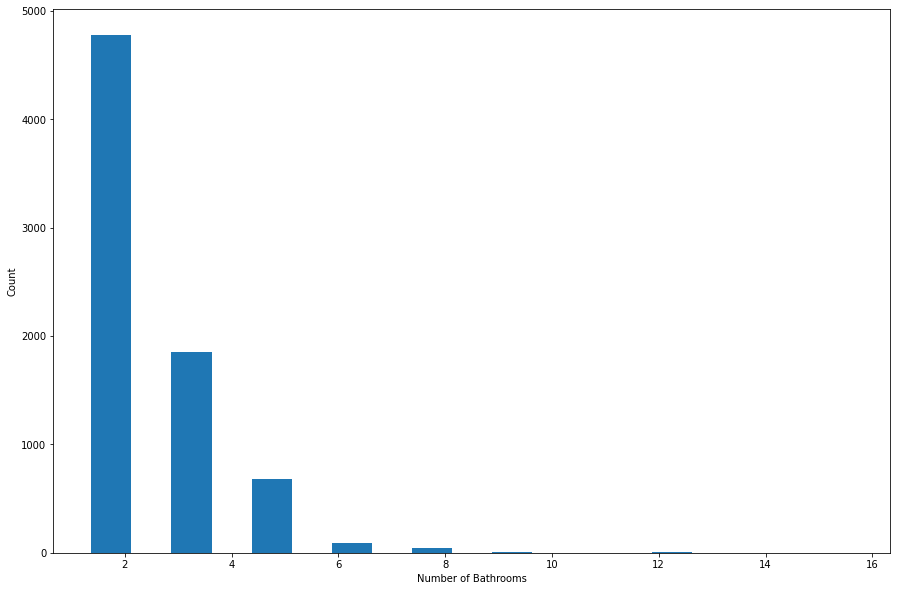

In [67]:
plt.hist(df4.bath, rwidth=0.5)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [68]:
# Removing the rows that have 'bath' greater than 'bhk'+2
df5 = df4[df4.bath<(df4.bhk+2)]
print(len(df4), len(df5))

7459 7395


In [69]:
df5.tail()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
10923,Super built-up Area,Not Ready,2.0,1.0,67.0,Yerawada,2,1165.0,5751.072961
10928,Built-up Area,Ready To Move,6.0,2.0,115.0,Yerawada,6,3500.0,3285.714286
10931,Built-up Area,Not Ready,2.0,2.0,353.0,Yerawada,5,3210.0,10996.884735
10932,Super built-up Area,Ready To Move,2.0,2.0,54.0,Yerawada,2,1050.0,5142.857143
10936,Super built-up Area,Not Ready,2.0,1.0,70.0,Yerawada,2,1132.0,6183.745583


In [70]:
# Removing the unnecessary columns (columns that were added only for removing the outliers)
df6 = df5.copy()
df6 = df6.drop('price_per_sqft', axis='columns')

### **Model Bulding**

In [71]:
df6.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft
0,Super built-up Area,Not Ready,2.0,1.0,39.07,Alandi Road,2,1056.0
1,Plot Area,Ready To Move,4.0,1.0,245.00,Alandi Road,4,2894.0
2,Super built-up Area,Ready To Move,2.0,2.0,50.00,Alandi Road,2,1084.0
3,Super built-up Area,Ready To Move,2.0,2.0,80.00,Alandi Road,2,1230.0
4,Super built-up Area,Ready To Move,3.0,2.0,130.00,Alandi Road,3,1750.0


In [72]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.site_location)
df6 = pd.concat([df6,dummy_cols], axis='columns')

# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.availability).drop('Not Ready', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.area_type).drop('Super built-up  Area', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [73]:
df6.drop(['area_type','availability','site_location'], axis='columns', inplace=True)
df6.head(10)

,bath,balcony,price,bhk,new_total_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,Bibvewadi,Bopodi,Budhwar Peth,Bund Garden Road,Camp,Chandan Nagar,Dapodi,Deccan Gymkhana,Dehu Road,Dhankawadi,Dhayari Phata,Dhole Patil Road,Erandwane,Fatima Nagar,Fergusson College Road,Ganesh Peth,Ganeshkhind,Ghorpade Peth,Ghorpadi,Gokhale Nagar,Gultekdi,Guruwar peth,Hadapsar,Hadapsar Industrial Estate,Hingne Khurd,...,Nana Peth,Narayan Peth,Narayangaon,Navi Peth,Padmavati,Parvati Darshan,Pashan,Paud Road,Pirangut,Prabhat Road,Pune Railway Station,Rasta Peth,Raviwar Peth,Sadashiv Peth,Sahakar Nagar,Salunke Vihar,Sasson Road,Satara Road,Senapati Bapat Road,Shaniwar Peth,Shivaji Nagar,Shukrawar Peth,Sinhagad Road,Somwar Peth,Swargate,Tilak Road,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,Ready To Move,Built-up Area,Carpet Area,Plot Area
0,2.0,1.0,39.07,2,1056.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.0,1.0,245.00,4,2894.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,2.0,2.0,50.00,2,1084.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2.0,2.0,80.00,2,1230.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3.0,2.0,130.00,3,1750.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,2.0,1.0,41.00,2,995.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
8,2.0,1.0,95.00,2,1360.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,2.0,2.0,50.00,2,1040.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
10,3.0,2.0,86.06,3,1655.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12,5.0,3.0,198.00,4,2790.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
# Size of the dataset
df6.shape

(7395, 105)

In [75]:
# Splitting the dataset into features and label
X = df6.drop('price', axis='columns')
y = df6['price']

### *Linear Regression Algorithm*

In [76]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [77]:
# Creating Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
model.score(X_test, y_test)

In [78]:
# Creating a fuction to predict values
def prediction(location, bhk, bath, balcony, sqft, area_type, availability):
    
    loc_index, area_index, avail_index = -1,-1,-1
        
    if location!='other':
        loc_index = int(np.where(X.columns==location)[0][0])
    
    if area_type!='Super built-up  Area':
        area_index = np.where(X.columns==area_type)[0][0]
        
    if availability!='Not Ready':        
        avail_index = np.where(X.columns==availability)[0][0]
            
    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = balcony
    x[2] = bhk
    x[3] = sqft
    
    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[area_index] = 1
    if avail_index >= 0:
        x[avail_index] = 1
        
    return model.predict([x])[0]

In [85]:
# Prediction 1
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('Camp', 2, 2, 2, 1000, 'Built-up  Area', 'Ready To Move')

51.09375

In [80]:
# Prediction 2
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('Hadapsar', 2, 2, 2, 1000, 'Super built-up  Area', 'Ready To Move')

52.03125

In [84]:
# Prediction 3
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('Balaji Nagar', 2, 3, 2, 2000, 'Plot  Area', 'Not Ready')

141.625

In [83]:
# Prediction 4
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('Hadapsar', 2, 3, 2, 2000, 'Plot  Area', 'Not Ready')

140.28125